# BoomBikes Company Bike Sharing Case Study

#### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially company wants to know - 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("day.csv")

In [4]:
# Check the head of the dataset
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
dataset.shape

(730, 16)

- season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [6]:
dataset['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
dataset['season'].value_counts()


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

- weathersit
		1. Clear, Few clouds, Partly cloudy, Partly cloudy                                          Few Clouds
		2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             Mist cloudy
		3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  Light snow
		4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                               Heavy Rain

In [7]:
dataset['weathersit'].replace({1:"Few Clouds",2:"Mist cloudy",3:"Light snow",4:"Heavy Rain"},inplace=True)
dataset['weathersit'].value_counts()

Few Clouds     463
Mist cloudy    246
Light snow      21
Name: weathersit, dtype: int64

- weekday

    0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"

In [8]:
dataset['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Saturday,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sunday,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Monday,1,Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tuesday,1,Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wednesday,1,Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- month

    1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"

In [9]:
dataset['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"},
                        inplace=True)
dataset.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,January,0,Saturday,0,Mist cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,January,0,Sunday,0,Mist cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,January,0,Monday,1,Few Clouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,January,0,Tuesday,1,Few Clouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,January,0,Wednesday,1,Few Clouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [11]:
dataset = dataset.drop(['instant','dteday','casual', 'registered'], axis =1)

In [12]:
dataset[['temp','atemp','hum','windspeed','cnt']]=dataset[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [13]:
dataset.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
dataset.shape

(730, 12)

In [15]:
dataset.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data
We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
cont = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

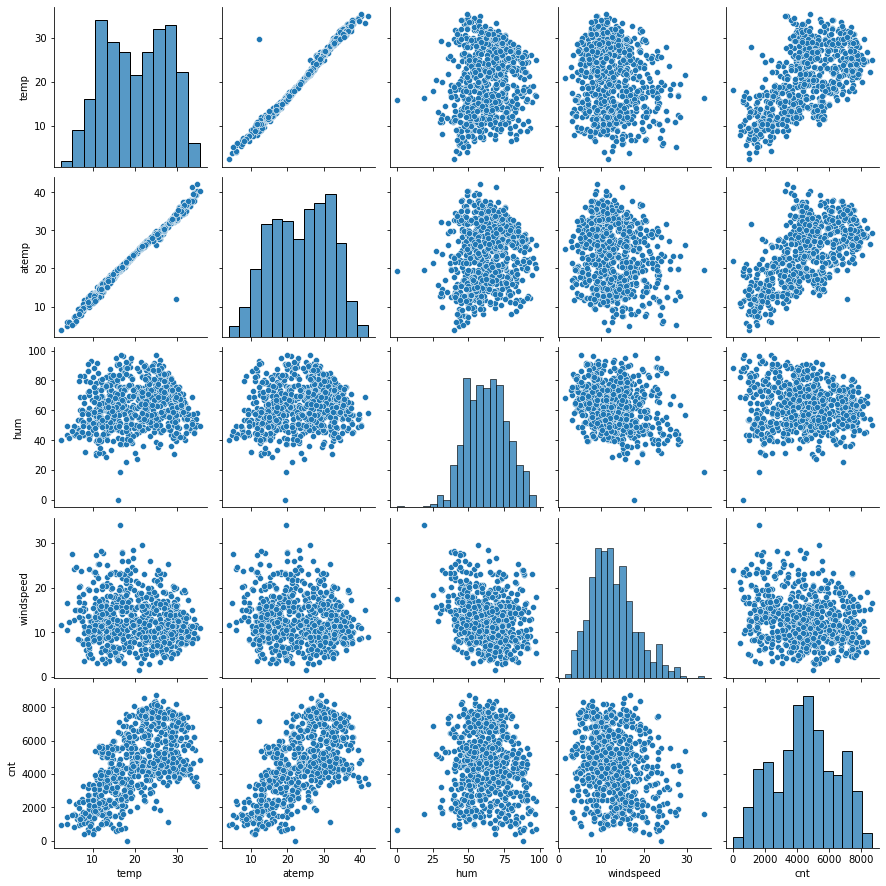

In [19]:
sns.pairplot(dataset[cont])
plt.show()

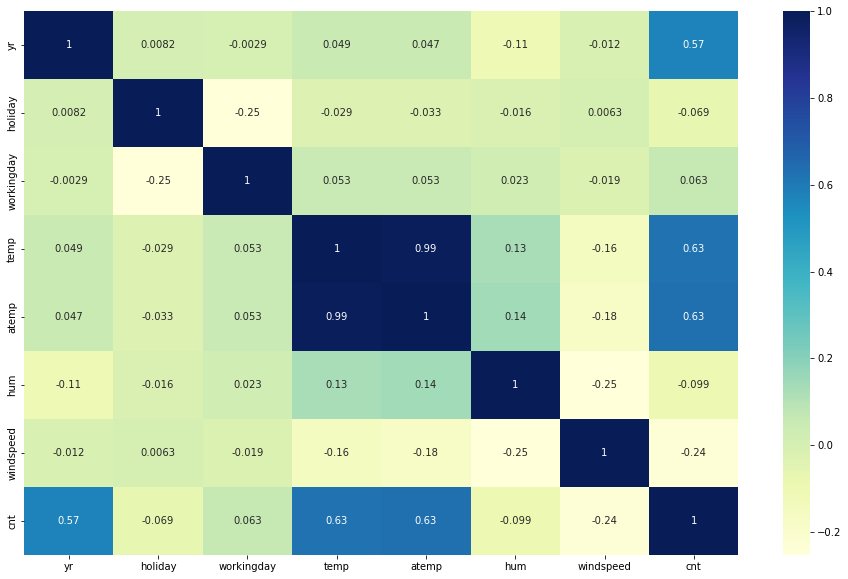

In [20]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [21]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

dataset.drop(['temp'],axis=1,inplace=True)
cont.remove('temp')
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist cloudy,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist cloudy,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Few Clouds,11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [22]:
dataset[cat].columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

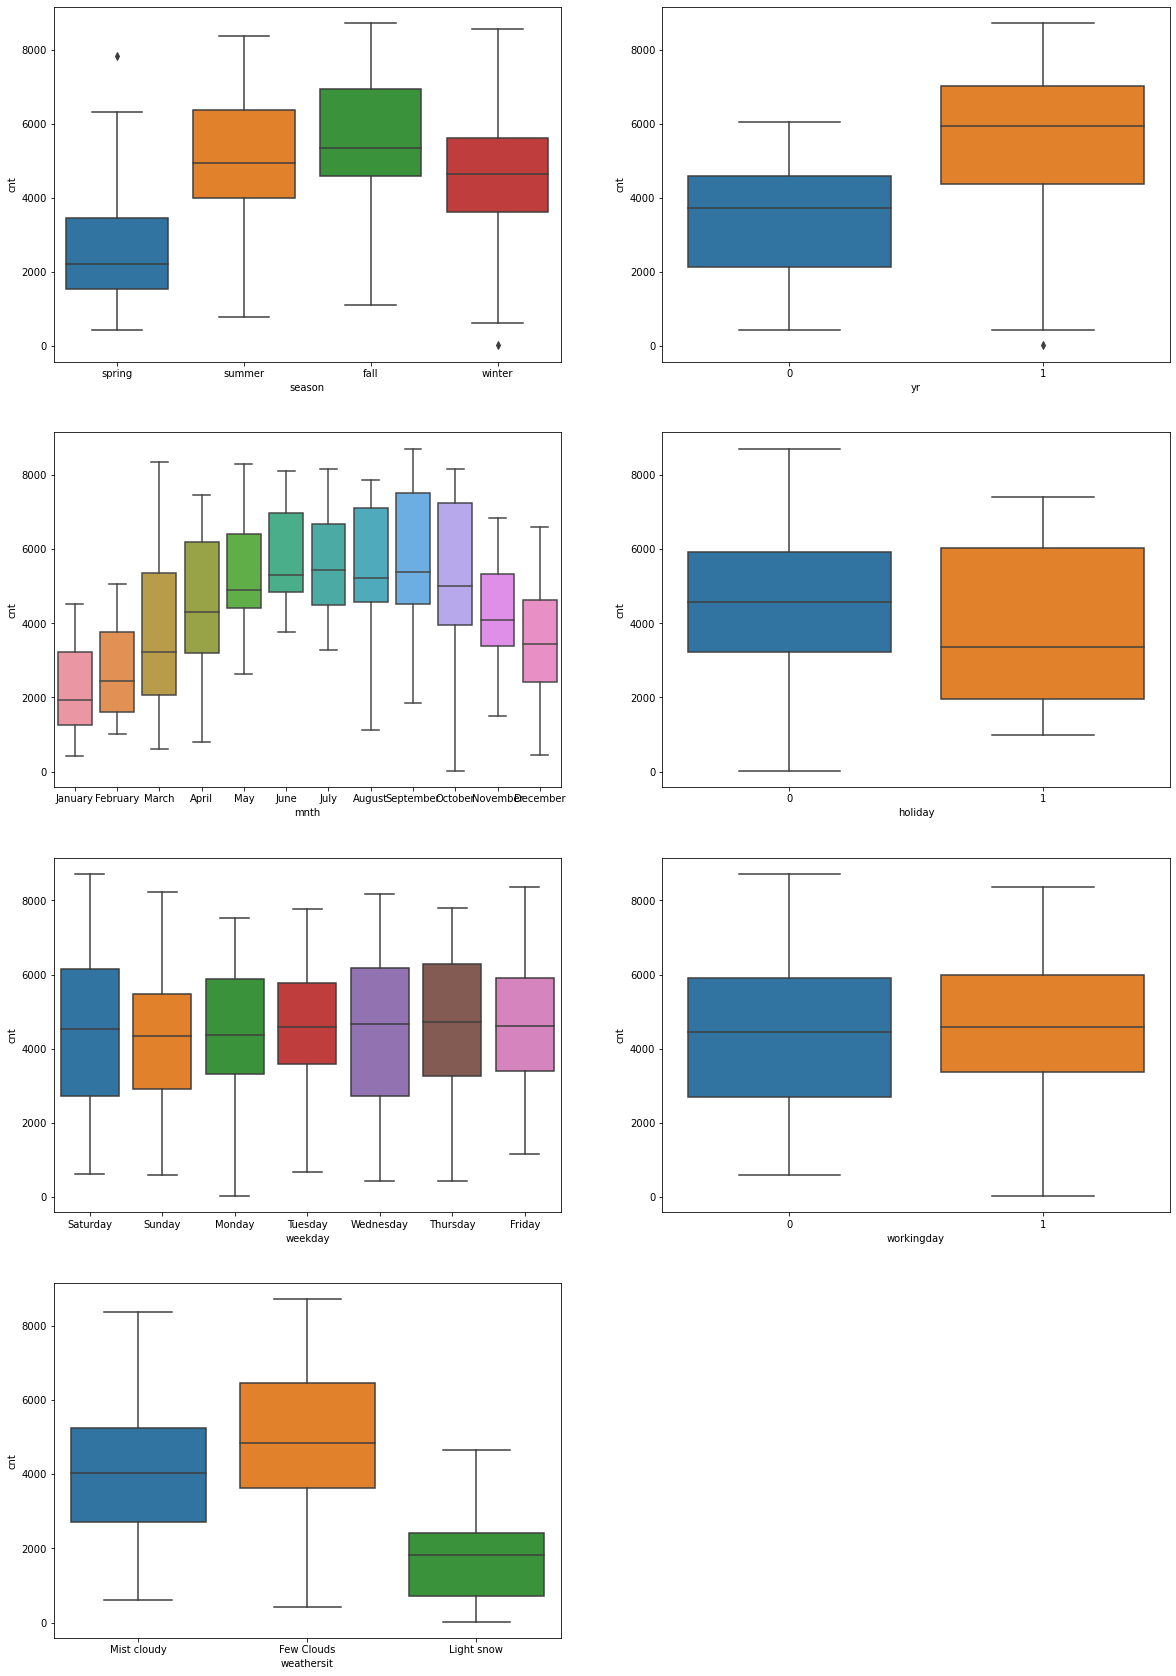

In [23]:
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = dataset)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = dataset)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = dataset)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = dataset)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dataset)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dataset)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dataset)

plt.show()

### Dummy Variables

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [25]:
dataset['mnth']=dataset['mnth'].astype(object)
dataset['season']=dataset['season'].astype(object)
dataset['weathersit']=dataset['weathersit'].astype(object)
dataset['weekday']=dataset['weekday'].astype(object)

In [26]:
Season_condition=pd.get_dummies(dataset['season'],drop_first=True)
Weather_condition=pd.get_dummies(dataset['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(dataset['weekday'],drop_first=True)
Month=pd.get_dummies(dataset['mnth'],drop_first=True)

In [27]:
Season_condition.columns

Index(['spring', 'summer', 'winter'], dtype='object')

In [28]:
Weather_condition.columns

Index(['Light snow', 'Mist cloudy'], dtype='object')

In [29]:
Day_of_week.columns

Index(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

In [30]:
Month.columns

Index(['August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September'],
      dtype='object')

In [31]:
dataset=pd.concat([dataset,Season_condition],axis=1)
dataset=pd.concat([dataset,Weather_condition],axis=1)
dataset=pd.concat([dataset,Day_of_week],axis=1)
dataset=pd.concat([dataset,Month],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   yr           730 non-null    int64  
 2   mnth         730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   atemp        730 non-null    float64
 8   hum          730 non-null    float64
 9   windspeed    730 non-null    float64
 10  cnt          730 non-null    int64  
 11  spring       730 non-null    uint8  
 12  summer       730 non-null    uint8  
 13  winter       730 non-null    uint8  
 14  Light snow   730 non-null    uint8  
 15  Mist cloudy  730 non-null    uint8  
 16  Monday       730 non-null    uint8  
 17  Saturday     730 non-null    uint8  
 18  Sunday       730 non-null    uint8  
 19  Thursday

In [32]:
#Deleting the orginal columns season.weathersit,weekday,mnth
dataset.drop(['season'],axis=1,inplace=True)
dataset.drop(['weathersit'],axis=1,inplace=True)
dataset.drop(['weekday'],axis=1,inplace=True)
dataset.drop(['mnth'],axis=1,inplace=True)

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   atemp        730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   spring       730 non-null    uint8  
 8   summer       730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  Light snow   730 non-null    uint8  
 11  Mist cloudy  730 non-null    uint8  
 12  Monday       730 non-null    uint8  
 13  Saturday     730 non-null    uint8  
 14  Sunday       730 non-null    uint8  
 15  Thursday     730 non-null    uint8  
 16  Tuesday      730 non-null    uint8  
 17  Wednesday    730 non-null    uint8  
 18  August       730 non-null    uint8  
 19  December

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [34]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
df_train[cont] = scaler.fit_transform(df_train[cont])

In [38]:
df_train[cont].head()

,atemp,hum,windspeed,cnt
653,0.501133,0.575354,0.300794,0.864243
576,0.766351,0.725633,0.264686,0.827658
426,0.438975,0.640189,0.255342,0.465255
728,0.200348,0.498067,0.663106,0.204096
482,0.391735,0.504508,0.188475,0.482973


In [39]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           510 non-null    int64  
 1   holiday      510 non-null    int64  
 2   workingday   510 non-null    int64  
 3   atemp        510 non-null    float64
 4   hum          510 non-null    float64
 5   windspeed    510 non-null    float64
 6   cnt          510 non-null    float64
 7   spring       510 non-null    uint8  
 8   summer       510 non-null    uint8  
 9   winter       510 non-null    uint8  
 10  Light snow   510 non-null    uint8  
 11  Mist cloudy  510 non-null    uint8  
 12  Monday       510 non-null    uint8  
 13  Saturday     510 non-null    uint8  
 14  Sunday       510 non-null    uint8  
 15  Thursday     510 non-null    uint8  
 16  Tuesday      510 non-null    uint8  
 17  Wednesday    510 non-null    uint8  
 18  August       510 non-null    uint8  
 19  Decembe

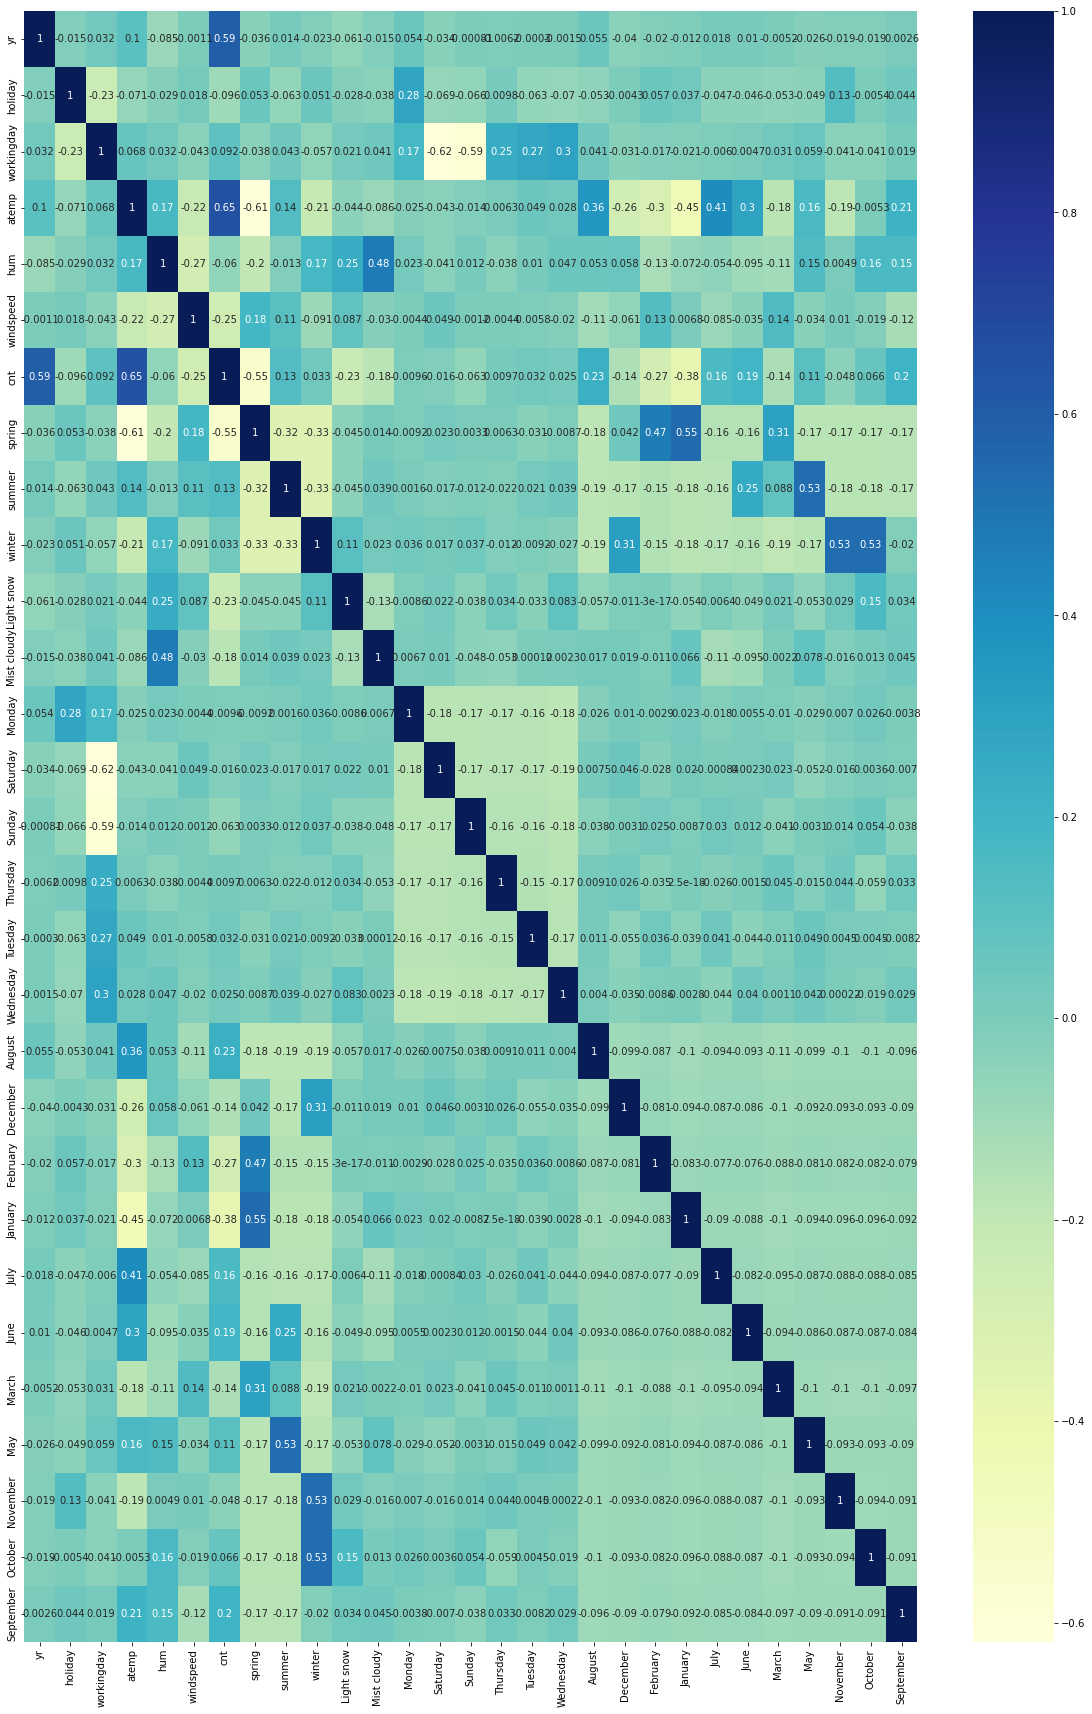

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
df_train.corr()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
yr,1.000000,-0.014980,0.031808,0.104206,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,...,-0.040049,-1.991603e-02,-1.179424e-02,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574
holiday,-0.014980,1.000000,-0.233863,-0.070640,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,...,-0.004302,5.652428e-02,3.741163e-02,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692
workingday,0.031808,-0.233863,1.000000,0.067811,0.031989,-0.043176,0.092320,-0.037932,0.043274,-0.057297,...,-0.031500,-1.680257e-02,-2.129625e-02,-0.006030,0.004694,0.030677,0.059006,-0.041271,-0.041271,0.019495
atemp,0.104206,-0.070640,0.067811,1.000000,0.169461,-0.215283,0.646475,-0.610741,0.135806,-0.211118,...,-0.261862,-2.995091e-01,-4.508322e-01,0.407105,0.295173,-0.178458,0.161923,-0.185697,-0.005262,0.206157
hum,-0.084792,-0.029093,0.031989,0.169461,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,...,0.057832,-1.295442e-01,-7.165160e-02,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628
windspeed,-0.001108,0.017569,-0.043176,-0.215283,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,...,-0.060975,1.331228e-01,6.793368e-03,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734
cnt,0.591508,-0.095961,0.092320,0.646475,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,...,-0.143598,-2.702870e-01,-3.781731e-01,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327
spring,-0.036320,0.053339,-0.037932,-0.610741,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,...,0.041868,4.715403e-01,5.488613e-01,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580
summer,0.013856,-0.063232,0.043274,0.135806,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,...,-0.172902,-1.522862e-01,-1.772574e-01,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473
winter,-0.022638,0.050712,-0.057297,-0.211118,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,...,0.314816,-1.538999e-01,-1.791357e-01,-0.165701,-0.163389,-0.189849,-0.174734,0.533619,0.533619,-0.020175


### Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [45]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light snow,...,December,February,January,July,June,March,May,November,October,September
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [46]:
dataset.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Light snow', 'Mist cloudy', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [47]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light snow', 'Mist cloudy', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

In [48]:
import statsmodels.api as sm

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.params

In [49]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.12e-180
Time:                        19:51:03   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2617      0.035      7.468      

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,83.25
12,Saturday,19.34
13,Sunday,18.01
6,spring,10.74
8,winter,9.47
7,summer,8.23
25,November,6.77
26,October,6.59
17,August,6.24
3,atemp,5.95


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### 2. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `March` has a significantly low VIF (`3.47`) and a very high p-value (`0.979`) as well. Hence, this variable isn't of much use and should be dropped.

In [52]:
# Dropping highly correlated variables and insignificant variables  2.March

X = X_train.drop('March', 1,)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.96e-181
Time:                        19:51:03   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     483   BIC:                            -879.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2613      0.033      7.969      

,Features,VIF
2,workingday,72.85
12,Saturday,16.89
13,Sunday,15.90
6,spring,9.62
8,winter,9.14
7,summer,7.93
3,atemp,5.79
17,August,5.48
21,July,4.94
24,November,4.86


### 3. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `October` has a significantly low VIF (`4.81`) and a very high p-value (`0.788`). Hence, this variable isn't of much use and should be dropped.

In [53]:
# Dropping highly correlated variables and insignificant variables   3. October
X = X.drop('October', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.86e-182
Time:                        19:51:04   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2632      0.032      8.216      

,Features,VIF
2,workingday,70.07
12,Saturday,16.25
13,Sunday,15.26
6,spring,9.20
8,winter,7.15
7,summer,6.75
3,atemp,5.77
17,August,4.63
21,July,4.24
1,holiday,3.83


### 4. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `Wednesday` has a significantly low VIF (`1.93`) and a very high p-value (`0.587`) as well. Hence, this variable isn't of much use and should be dropped.

In [54]:
# Dropping highly correlated variables and insignificant variables   - 4. Wednesday
X = X.drop('Wednesday', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_4.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.12e-183
Time:                        19:51:04   Log-Likelihood:                 523.65
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     485   BIC:                            -891.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2624      0.032      8.206      

,Features,VIF
2,workingday,68.36
12,Saturday,16.20
13,Sunday,15.22
6,spring,9.19
8,winter,7.15
7,summer,6.74
3,atemp,5.76
16,August,4.63
20,July,4.24
1,holiday,3.78


### 5. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `Thursday` has a significantly low VIF (`1.29`) and a very high p-value (`0.507`). Hence, this variable isn't of much use and should be dropped.

In [55]:
# Dropping highly correlated variables and insignificant variables   - 5. Thursday
X = X.drop('Thursday', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_5.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.61e-184
Time:                        19:51:04   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     486   BIC:                            -897.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2609      0.032      8.184      

,Features,VIF
2,workingday,67.43
12,Saturday,16.20
13,Sunday,15.22
6,spring,9.19
8,winter,7.14
7,summer,6.74
3,atemp,5.76
15,August,4.63
19,July,4.23
1,holiday,3.73


### 6. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `July` has a significantly low VIF (`4.23`) and a very high p-value (`0.468`). Hence, this variable isn't of much use and should be dropped.

In [56]:
# Dropping highly correlated variables and insignificant variables   - 6. July
X = X.drop('July', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_6.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.27e-185
Time:                        19:51:04   Log-Likelihood:                 523.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2541      0.030      8.345      

,Features,VIF
2,workingday,61.36
12,Saturday,14.63
13,Sunday,13.83
6,spring,6.05
3,atemp,4.87
8,winter,4.11
7,summer,4.04
1,holiday,3.55
18,January,2.39
4,hum,2.00


### 7. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `holiday` has a significantly low VIF (`3.55`) and a very high p-value (`0.456`). Hence, this variable isn't of much use and should be dropped.

In [57]:
# Dropping highly correlated variables and insignificant variables   - 7. holiday
X = X.drop('holiday', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_7.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.27e-185
Time:                        19:51:05   Log-Likelihood:                 523.14
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     487   BIC:                            -902.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2712      0.046      5.845      

,Features,VIF
3,hum,36.54
2,atemp,23.33
1,workingday,20.02
5,spring,6.40
11,Saturday,5.57
12,Sunday,5.29
4,windspeed,5.05
7,winter,4.75
6,summer,4.33
17,January,2.44


### 8. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `Sunday` has a significantly low VIF (`5.29`) and a very high p-value (`0.359`). Hence, this variable isn't of much use and should be dropped.

In [58]:
# Dropping highly correlated variables and insignificant variables   - 8. Sunday 
X = X.drop('Sunday', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_8.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          6.89e-186
Time:                        19:51:05   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -908.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2950      0.039      7.656      

,Features,VIF
3,hum,33.29
2,atemp,20.03
5,spring,5.90
1,workingday,5.16
4,windspeed,4.80
7,winter,4.42
6,summer,3.98
16,January,2.40
9,Mist cloudy,2.32
0,yr,2.12


### 9. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `Tuesday` has a significantly low VIF (`1.33`) and a very high p-value (`0.200`). Hence, this variable isn't of much use and should be dropped.

In [59]:
# Dropping highly correlated variables and insignificant variables   - 9. Tuesday
X = X.drop('Tuesday', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_9.summary())



vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.31e-186
Time:                        19:51:05   Log-Likelihood:                 521.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     489   BIC:                            -912.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2960      0.039      7.679      

,Features,VIF
3,hum,33.28
2,atemp,20.02
5,spring,5.89
1,workingday,4.85
4,windspeed,4.80
7,winter,4.42
6,summer,3.98
15,January,2.40
9,Mist cloudy,2.32
0,yr,2.12


### 10. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `June` has a significantly low VIF (`1.55`) and a very high p-value (`0.118`). Hence, this variable isn't of much use and should be dropped.

In [60]:
# Dropping highly correlated variables and insignificant variables   - 10. June
X = X.drop('June', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_10.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.60e-187
Time:                        19:51:05   Log-Likelihood:                 520.56
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     490   BIC:                            -916.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2902      0.038      7.552      

,Features,VIF
3,hum,32.59
2,atemp,17.53
5,spring,5.89
1,workingday,4.84
4,windspeed,4.75
7,winter,4.41
6,summer,3.78
15,January,2.37
9,Mist cloudy,2.32
0,yr,2.11


### 11. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `May` has a significantly low VIF (`1.59`) and a very high p-value (`0.085`). Hence, this variable isn't of much use and should be dropped.

In [61]:
# Dropping highly correlated variables and insignificant variables   - 11. May
X = X.drop('May', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_11.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.25e-187
Time:                        19:51:05   Log-Likelihood:                 519.02
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     491   BIC:                            -919.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2777      0.038      7.345      

,Features,VIF
3,hum,32.52
2,atemp,17.48
5,spring,5.89
1,workingday,4.84
4,windspeed,4.67
7,winter,4.41
6,summer,3.27
15,January,2.37
9,Mist cloudy,2.32
0,yr,2.10


### 12. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `spring` has a significantly high VIF (`5.89`) and a very high p-value (`0.074`). Hence, this variable isn't of much use and should be dropped.

In [62]:
# Dropping highly correlated variables and insignificant variables   - 12. spring
X = X.drop('spring', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_12.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.3
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.77e-188
Time:                        19:51:06   Log-Likelihood:                 517.36
No. Observations:                 510   AIC:                            -998.7
Df Residuals:                     492   BIC:                            -922.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2437      0.033      7.438      

,Features,VIF
3,hum,25.75
2,atemp,14.97
1,workingday,4.71
4,windspeed,4.04
6,winter,3.05
5,summer,2.30
8,Mist cloudy,2.23
0,yr,2.07
14,January,1.97
10,Saturday,1.84


### 13. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `Monday` has a significantly low VIF (`1.23`) and a very high p-value (`0.078`). Hence, this variable isn't of much use and should be dropped.

In [63]:
# Dropping highly correlated variables and insignificant variables   - 13. Monday
X = X.drop('Monday', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_13.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.69e-188
Time:                        19:51:06   Log-Likelihood:                 515.75
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     493   BIC:                            -925.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2429      0.033      7.399      

,Features,VIF
3,hum,25.70
2,atemp,14.97
1,workingday,4.67
4,windspeed,4.03
6,winter,3.04
5,summer,2.30
8,Mist cloudy,2.23
0,yr,2.07
13,January,1.97
9,Saturday,1.83


### 14. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `hum` has a significantly high very VIF (`25.70`) and a low p-value (`0.000`). Hence, this variable isn't of much use and should be dropped.

In [64]:
# Dropping highly correlated variables and insignificant variables   - 14. hum
X = X.drop('hum', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_14.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.90e-186
Time:                        19:51:06   Log-Likelihood:                 507.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     494   BIC:                            -915.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1647      0.027      6.173      

,Features,VIF
2,atemp,6.43
1,workingday,4.56
3,windspeed,3.99
5,winter,2.65
4,summer,2.09
0,yr,2.06
8,Saturday,1.81
13,November,1.78
9,August,1.60
7,Mist cloudy,1.58


### 15. Dropping the Variable and Updating the Model    

As you might have noticed, the variable `atemp` has a significantly high VIF (`6.43`) and a very high p-value (`0.000`). Hence, this variable isn't of much use and should be dropped.

In [65]:
# Dropping highly correlated variables and insignificant variables   - 15. atemp
X = X.drop('atemp', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_15.summary())

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.89e-150
Time:                        19:51:06   Log-Likelihood:                 419.08
No. Observations:                 510   AIC:                            -808.2
Df Residuals:                     495   BIC:                            -744.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.019     25.145      

,Features,VIF
2,windspeed,3.64
1,workingday,3.55
4,winter,2.59
3,summer,1.98
0,yr,1.92
12,November,1.77
7,Saturday,1.62
6,Mist cloudy,1.58
9,December,1.43
8,August,1.36


In [66]:
X.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'winter', 'Light snow',
       'Mist cloudy', 'Saturday', 'August', 'December', 'February', 'January',
       'November', 'September'],
      dtype='object')

In [67]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light snow', 'Mist cloudy', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September'],
      dtype='object')

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
y_train_price = lr_15.predict(X_train_lm)

Text(0.5, 0, 'Errors')

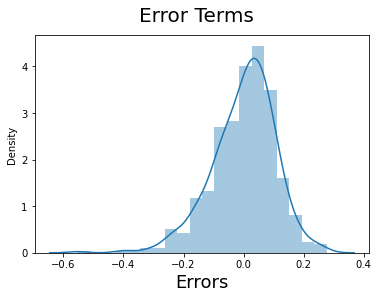

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 15th model.

#### Applying the scaling on the test sets

In [70]:
df_test[cont] = scaler.transform(df_test[cont])

In [71]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,December,February,January,July,June,March,May,November,October,September
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [74]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m15 = X_test_m15.drop(['holiday','atemp', 'hum','Monday','Sunday','Thursday', 'Tuesday', 'Wednesday','July', 'June', 'March', 'May','October','spring'], axis = 1)

In [75]:
# Making predictions using the fourth model

y_pred_m15 = lr_15.predict(X_test_m15)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(y_true=y_test,y_pred=y_pred_m15)

0.7280137824940103

Text(0, 0.5, 'y_pred')

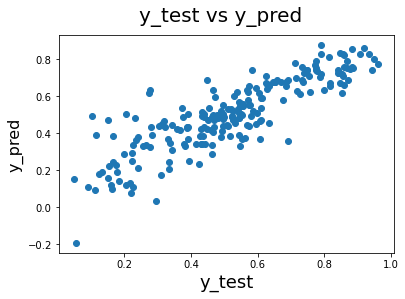

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [80]:
##Final Model
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.89e-150
Time:                        20:00:57   Log-Likelihood:                 419.08
No. Observations:                 510   AIC:                            -808.2
Df Residuals:                     495   BIC:                            -744.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4725      0.019     25.145      

## We can see that the equation for best fitted line is:

cnt = 0.2462 x yr + 0.0541 x workingday +   0.0436 x summer +  0.0862 x  winter  + 0.0587 Saturday + 0.0097 x August  + 0.116 x September - 0.2370 x windspeed - 0.3149 x Light snow - 0.0951 x Mist cloudy - 0.1696 x December - 0.2075 x Feburary - 0.2782 x January - 0.1170 x November

In [81]:
### We can see the demand for bikes depends mainly on below variables:
X.columns

Index(['yr', 'workingday', 'windspeed', 'summer', 'winter', 'Light snow',
       'Mist cloudy', 'Saturday', 'August', 'December', 'February', 'January',
       'November', 'September'],
      dtype='object')

For Numberical Value:
Demand decreses if increase in windspeed

Demands increases in workingday, summer, winter, Saturday, August, September

Demand decreases in Light snow, Mist cloudy, December, Feburary, January, November

In [82]:
r2_score(y_true=y_test,y_pred=y_pred_m15)

0.7280137824940103

- top features explaining cnt are:
1. weather situation(Light snow)     -0.3149
2. year (0: 2018, 1:2019)             0.2462
3. windspeed                          -0.2370